### Artificial Intelligence.

#### Oscar Hernández Terán. Geophysical engineer.

Least squares calculation program.

In [1]:
# Important libraries
import numpy as np
import scipy as sc
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import time
plt.style.use('default')
%matplotlib inline

In [2]:
# Important datasets
from sklearn.datasets import load_boston 

In [3]:
# Loading and visualizing data
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Product of the minimization of the mean squared error.

$\beta = (X^{T}X)^{-1}X^{T}Y          ...... (1)$

In [4]:
# Matrix of average number of rooms per dwelling
X = np.array(boston.data[:,5])

# Matrix of medium value
Y = np.array(boston.target)

In [5]:
# We add columns of one for independent term
X2 = np.array([np.ones(506),X]).T

# Application of formula 1
B = np.linalg.inv((X2.T @ X2)) @ X2.T @ Y

# The variable B have the form (1,2)
# In the common model: y = m*x + b
# B[0] = b ; B[1] = m
# We found the line
x = np.linspace(3,10,10)
y = B[1]*x + B[0]

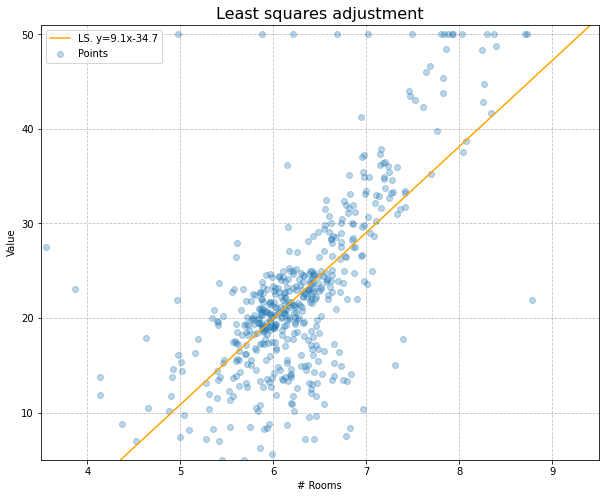

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(X, Y, alpha = 0.3, label='Points')
plt.plot(x,y, color='orange', linestyle='-', label='LS. y={:.2}x{:.3}'.format(B[1],B[0]))
plt.grid(b=True, linestyle='--', alpha=0.25, color='k')
plt.title('Least squares adjustment', fontsize=16)
plt.xlabel('# Rooms')
plt.ylabel('Value')
plt.xlim(3.5,9.5)
plt.ylim(5,51)
plt.legend()
plt.show()

In [7]:
# We now calculate the linear model using the sklearn library
from sklearn.linear_model import LinearRegression
regresion = LinearRegression()
regresion.fit(X.reshape(-1,1), Y.reshape(-1,1))
m = regresion.coef_
b = regresion.intercept_

# The models represent the same line
print('sklearn model')
print(f'y = {m}x  {b}')
print('-'*25)
print('Analitic model')
print(f'y = {B[1]}x {B[0]}')

sklearn model
y = [[9.10210898]]x  [-34.67062078]
-------------------------
Analitic model
y = 9.102108981180091x -34.670620776437374


In [8]:
# Performance analisys
n = 50000000

# Noise application function
def f(x):
    np.random.seed(10)
    y = 0.05*x + 10.25 + 0.2*np.random.randn(x.shape[0])
    return y

# Vector creation
x = np.linspace(0,25,n)
y = f(x)

In [9]:
# Ordinary least squares calculation
ti = time.time()
x2 = np.array([np.ones(n),x]).T
B = np.linalg.inv((x2.T @ x2)) @ x2.T @ y
yr = B[1]*x + B[0]
tf = time.time()
print(f'y = {B[1]} x +{B[0]}')
print('-'*50)
print('Computing time',tf-ti, '[s]')

y = 0.049998383710402876 x +10.25006511643303
--------------------------------------------------
Computing time 1.9271354675292969 [s]


In [10]:
# Calculation by sklearn library
ti = time.time()
regresion = sk.linear_model.LinearRegression()
regresion.fit(x.reshape(-1,1), y.reshape(-1,1))
yr2 = regresion.coef_*x + regresion.intercept_
tf = time.time()
m = regresion.coef_
b = regresion.intercept_
print(f'y = {m}x  +{b}')
print('-'*50)
print('Computing time',tf-ti, '[s]')

y = [[0.04999838]]x  +[10.25006512]
--------------------------------------------------
Computing time 29.053012132644653 [s]
